In [1]:
import pyAMARES

Current pyAMARES version is 0.3.0
Author: Jia Xu, MR Research Facility, University of Iowa


# Fitting Simulated In Vivo 31P MRS Data

## Simulating an In Vivo MRS Spectrum

- **Load Prior Knowledge**: Use the dataset based on the 7T brain data reported by Ren et al. in NMR Biomedicine, 28(11): 1455–1462.

Warning, fid is None!
Checking comment lines in the prior knowledge file
Comment: in line 0 "#  Ren et al, NMR Biomed . 2015 Nov;28(11):1455-62. doi: 10.1002/nbm.3384.",,,,,,,,,,,,,,,,

Comment: in line 1 #  Phase not fixed,,,,,,,,,,,,,,,,



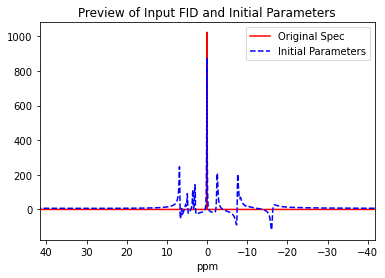

Printing the Prior Knowledge File ./attachment/example_human_brain_31P_7T.csv


,BATP,BATP2,BATP3,AATP,AATP2,GATP,GATP2,UDPG,NAD,PCr,GPC,GPE,Pin,Pex,PC,PE
Index,,,,,,,,,,,,,,,,
Initial Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude,1.41,BATP/2,BATP/2,1.545,AATP,1.5,GATP,0.08,0.41,4.37,1.32,0.8,0.85,0.3,0.3,2.27
chemicalshift,-16.15,BATP-15Hz,BATP+15Hz,-7.56,AATP-16Hz,-2.52,GATP-16Hz,-9.72,-8.25,0,2.95,3.5,4.82,5.24,6.24,6.76
linewidth,58.12,BATP,BATP,32.28,AATP,39.02,GATP,32.37,40.49,15.41,19.96,19.1,21.04,30.91,19.96,22.63
phase,0,BATP,BATP,0,AATP,0,GATP,0,0,0,0,0,0,0,0,0
g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude,"(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,"
chemicalshift,"(-16.20,-16.10)","(-16.20, -16.10)","(-16.20, -16.10)","(-7.58,-7.54)","(-7.58,-7.54)","(-2.53,-2.51)","(-2.53,-2.51)","(-9.76,-9.68)","(-8.25,-8.17)","(-0.5, 0.5)","(2.94,2.96)","(3.49,3.51)","(4.81,4.83)","(5.19,5.29)","(6.22,6.26)","(6.71,6.81)"


In [2]:
priorknowledge =  pyAMARES.initialize_FID(fid=None,
                                priorknowledgefile='./attachment/example_human_brain_31P_7T.csv',
                                preview=True) 

- **Perturb Peak Parameters**: Randomly adjust the 31P spectra peak parameters by 5% 

In [3]:
from copy import deepcopy

In [4]:
params = deepcopy(priorknowledge.initialParams) # Make a copy of initialParams to be perturbed

In [5]:
def perturb_value(value, percentage=5):
    percentage = float(percentage)
    # Generate a random perturbation factor between 0.95 and 1.05
    factor = np.random.uniform(1-percentage/100, 1+percentage/100)
    
    # Apply the perturbation factor
    result = value * factor
    
    return result

In [6]:
for i in params:
    params[i].value = perturb_value(params[i].value)
params

name,value,initial value,min,max,vary,expression
ak_BATP,1.43299490,1.41,0.00000000,inf,True,
freq_BATP,-1944.00000,-1937.9999999999998,-1944.00000,-1932.00000,True,
dk_BATP,190.451601,182.58936502663877,0.00000000,194.499143,True,
phi_BATP,0.00000000,0.0,-3.14159265,3.14159265,True,
g_BATP,0.00000000,0.0,0.00000000,1.00000000,False,
ak_BATP2,0.71649745,0.705,0.00000000,inf,False,ak_BATP/2
freq_BATP2,-1944.00000,-3738.0,-1944.00000,-1932.00000,False,freq_BATP-15
dk_BATP2,190.451601,182.58936502663877,0.00000000,194.499143,False,dk_BATP
phi_BATP2,0.00000000,0.0,-3.14159265,3.14159265,False,phi_BATP
g_BATP2,0.00000000,0.0,0.00000000,1.00000000,False,


- **Simulate the 31P MRS Spectra Using Scanner Parameters**:
    - **MHz (Field Strength)**: 120 MHz, corresponding to 31P at 7T.
    - **sw (Spectral Width)**: 10000.0 Hz.
    - **Deadtime**: 200 microseconds (200e-6 seconds).
    - **Number of Points (fid_len)**: 1024.
    - **SNR (Signal to Noise Ratio, snr_target)**: 20.

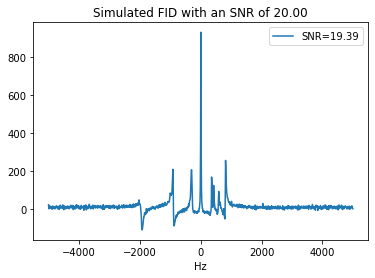

In [7]:
fid = pyAMARES.kernel.fid.simulate_fid(params, 
                                       MHz=120.0, 
                                       sw=10000.0, 
                                       deadtime=200e-6, 
                                       fid_len=1024, 
                                       snr_target=20 , 
                                       preview=True)

## Simple Tutorial on pyAMARES Fitting
- **Initialize the FID Object**: 

In [8]:
FIDobj =  pyAMARES.initialize_FID(fid=fid,
                                  MHz=120.0, 
                                  sw=10000.0, 
                                  deadtime=200e-6,
                                  priorknowledgefile='/home/xujia/gitlab/pyAMARES/pyAMARES/examples/example_human_brain_31P_7T.csv',
                                  preview=False) 

Checking comment lines in the prior knowledge file
Comment: in line 0 "#  Ren et al, NMR Biomed . 2015 Nov;28(11):1455-62. doi: 10.1002/nbm.3384.",,,,,,,,,,,,,,,,

Comment: in line 1 #  Phase not fixed,,,,,,,,,,,,,,,,



- **A. HSVD Optimization of Initial Parameters (Optional)**: Utilize HSVD to optimize the initial parameters for fitting, if desired.

Norm of residual= 0.561
Norm of the data=24.070
resNormSq / dataNormSq = 0.023


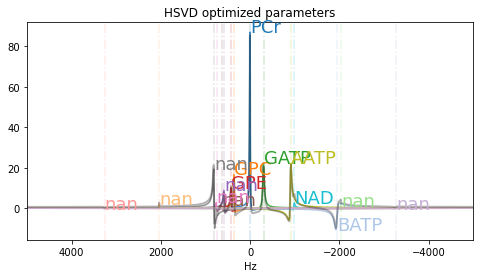

In [9]:
params_hsvd = pyAMARES.HSVDinitializer(fid_parameters=FIDobj, 
                                      num_of_component=16, 
                                      fitting_parameters=FIDobj.initialParams, preview=True)

- **Fitting AMARES Using HSVD-Initialized Parameters**:

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 1.000e-06
Fitting with method=least_squares took 2.707184 seconds
Norm of residual= 0.567
Norm of the data=24.070
resNormSq / dataNormSq = 0.024
plotParameters.xlim=None
xlim=None


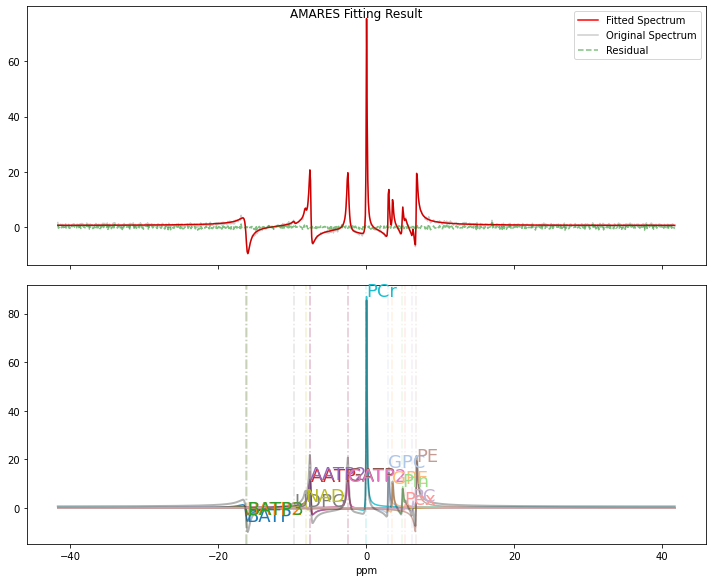

In [10]:
FIDresult1 = pyAMARES.fitAMARES(fid_parameters=FIDobj, fitting_parameters=params_hsvd, 
                       method='least_squares', ifplot=True,
                       inplace=False)

In [11]:
FIDresult1.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%)
name,,,,,,,,,,,,,,,
BATP,0.276,0.005,2.548,-16.200,0.013,0.057,61.772,1.652,3.578,13.273,1.053,10.999,0.000,0.000,nan
AATP,0.297,0.005,2.334,-7.540,0.005,0.049,31.720,0.692,2.800,13.117,0.945,10.196,0.000,0.000,nan
GATP,0.297,0.004,1.909,-2.510,0.006,0.176,40.790,0.785,2.597,12.442,0.803,8.792,0.000,0.000,nan
UDPG,0.013,0.004,44.881,-9.760,0.064,0.896,35.619,15.427,58.923,21.597,18.906,119.064,0.000,0.000,nan
NAD,0.037,0.005,19.708,-8.205,0.023,0.387,33.690,5.536,22.601,16.119,8.392,70.054,0.000,0.000,nan
PCr,0.422,0.002,0.776,-0.000,0.000,1378.262,14.830,0.117,1.075,12.793,0.327,3.476,0.000,0.000,nan
GPC,0.132,0.003,3.394,2.944,0.002,0.115,19.042,0.599,4.276,10.032,1.430,19.382,0.000,0.000,nan
GPE,0.080,0.003,5.919,3.490,0.004,0.173,19.793,1.068,7.338,13.084,2.493,25.917,0.000,0.000,nan
Pin,0.081,0.006,9.890,4.830,0.007,0.194,22.727,1.656,9.912,13.328,4.166,42.514,0.000,0.000,nan


- **B. Initialization Using Levenberg-Marquardt Method**: Instead of using the HSVD initializer, initialize the parameters using the Levenberg-Marquardt method.

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 1.000e-06
Fitting with method=leastsq took 4.646077 seconds
a_sd is all None, use crlb instead!
freq_sd is all None, use crlb instead!
lw_sd is all None, use crlb instead!
phase_sd is all None, use crlb instead!
g_std is all None, use crlb instead!
Norm of residual= 0.775
Norm of the data=24.070
resNormSq / dataNormSq = 0.032
plotParameters.xlim=None
xlim=None


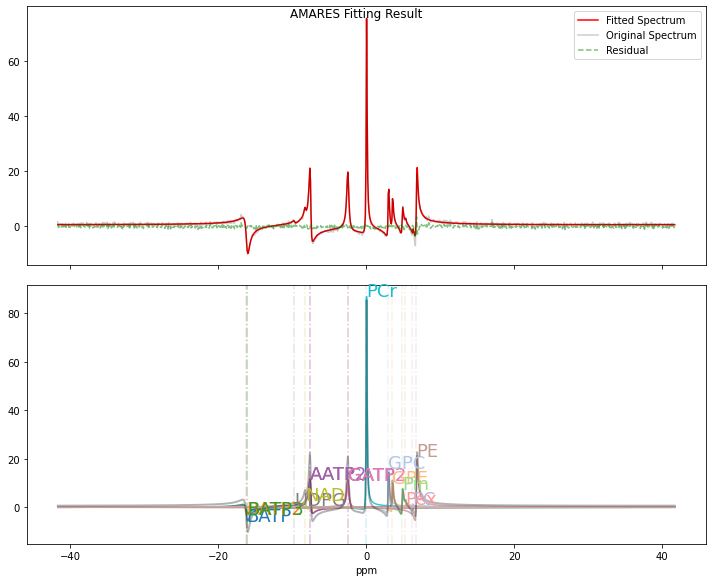

In [12]:
params_LM = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                               fitting_parameters=FIDobj.initialParams, 
                               method='leastsq', 
                               ifplot=True,
                               inplace=False)

- **Fitting AMARES Using Levenberg-Marquardt-Initialized Parameters**:

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 1.000e-06
Fitting with method=least_squares took 2.876954 seconds
Norm of residual= 0.567
Norm of the data=24.070
resNormSq / dataNormSq = 0.024
plotParameters.xlim=None
xlim=None


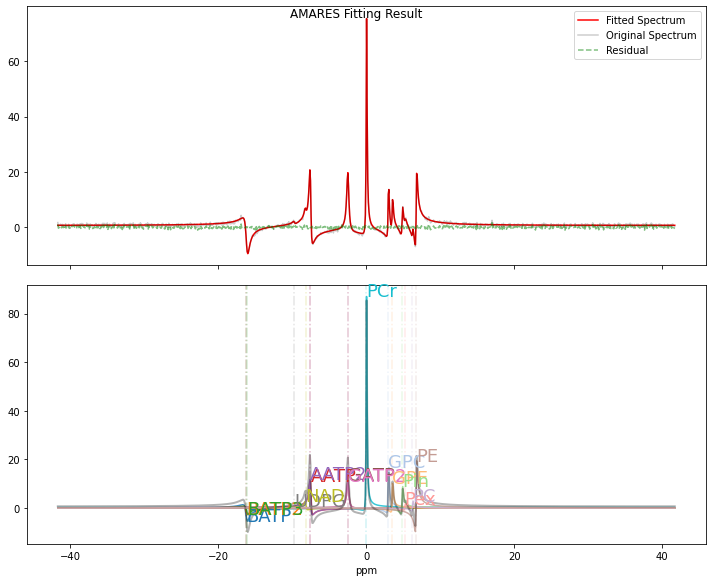

In [13]:
FIDresult2 = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                                fitting_parameters=params_LM.fittedParams, 
                       method='least_squares', ifplot=True,
                       inplace=False)

In [14]:
FIDresult2.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%)
name,,,,,,,,,,,,,,,
BATP,0.276,0.005,2.548,-16.200,0.013,0.057,61.771,1.652,3.578,13.273,1.053,10.999,0.000,0.000,nan
AATP,0.297,0.005,2.334,-7.540,0.005,0.049,31.720,0.692,2.800,13.116,0.945,10.194,0.000,0.000,nan
GATP,0.297,0.004,1.909,-2.510,0.006,0.176,40.790,0.785,2.597,12.441,0.803,8.792,0.000,0.000,nan
UDPG,0.013,0.004,44.873,-9.760,0.064,0.896,35.619,15.424,58.914,21.606,18.902,118.994,0.000,0.000,nan
NAD,0.037,0.005,19.704,-8.206,0.023,0.386,33.669,5.532,22.600,16.138,8.390,69.957,0.000,0.000,nan
PCr,0.422,0.002,0.776,-0.000,0.000,1378.681,14.830,0.117,1.075,12.793,0.327,3.476,0.000,0.000,nan
GPC,0.132,0.003,3.394,2.944,0.002,0.115,19.042,0.599,4.276,10.032,1.430,19.382,0.000,0.000,nan
GPE,0.080,0.003,5.919,3.490,0.004,0.173,19.793,1.068,7.338,13.084,2.493,25.917,0.000,0.000,nan
Pin,0.081,0.006,9.889,4.830,0.007,0.194,22.727,1.656,9.912,13.328,4.166,42.513,0.000,0.000,nan


## Visualize Fitting Results

- **Visualization with pyAMARES**: pyAMARES utilizes the `plotParameter` object to display fitting results visually.
- **Template for `plotParameter`**: Within the initialized `FIDobj`, there is a pre-configured template for `plotParameter` to facilitate customization and usage.

In [15]:
plotParameter = FIDobj.plotParameters # plotParameter is a pointer to FIDobj.plotParameters
                                      # If you do not want to modify FIDobj.plotParameters, 
                                      # do plotParameter = deepcopy(FIDobj.plotParameters) instead
plotParameter

Namespace(deadtime=0.0002, ifphase=False, lb=2.0, sw=10000.0, xlim=None)

- **Modify the visualization parameters**

In [16]:
plotParameter.ifphase = True # Phasing the spectrum for visualization
plotParameter.xlim = (10, -20) # Show 10 to -20 ppm only

fitting_parameters is None, just use the fid_parameters.out_obj.params
plotParameters.xlim=(10, -20)
xlim=(10, -20)


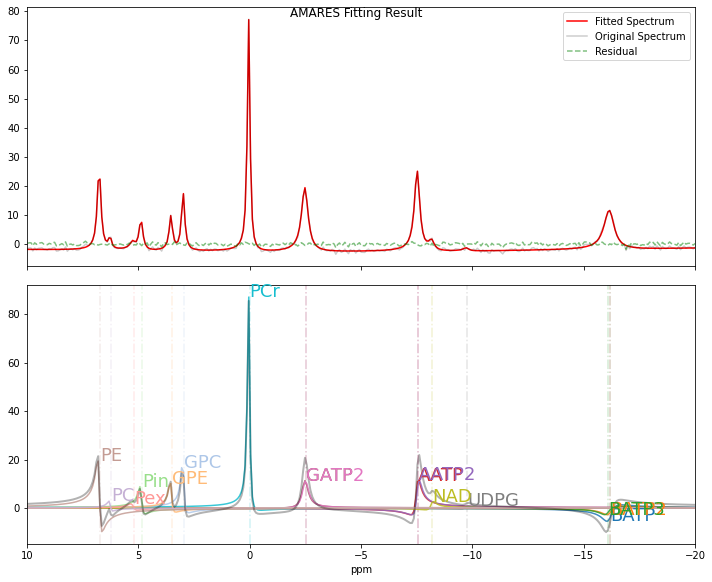

In [17]:
pyAMARES.plotAMARES(FIDresult2, plotParameters=plotParameter)

- **Uniform Phase for All Peaks**: Previously, each peak's phase was fitted independently. We can now attempt to use the same phase for all peaks.
- **Editing Parameters**: Parameters can be edited programmatically using Python. Alternatively, you can manually edit them using Excel or similar software. Use the `pyAMARES.kernel.lmfit.save_parameter_to_csv` function to save parameters to a CSV file, and `pyAMARES.kernel.lmfit.load_parameter_from_csv` to reload them as an lmfit parameter object.
``

In [18]:
initial_params_fixedphase = deepcopy(params_LM.fittedParams) # Starting from the Levenberg-Marquardt-Initialized Parameters

In [19]:
# Constrain all phase parameters (starting with `phi` ) to the phase of PCr (`phi_Pcr`)
for peak_para in initial_params_fixedphase:
    if peak_para.startswith('phi'):
        initial_params_fixedphase[peak_para].expr = 'phi_PCr'

In [20]:
# But do not fix phi_PCr itself because it will be fitted
initial_params_fixedphase['phi_PCr'].expr = None
initial_params_fixedphase['phi_PCr'].vary = True

- If you modified the `FIDobj.plotParameters` above and turned on `ifphase`, the following preview will show phased spectrum

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 1.000e-06
Fitting with method=least_squares took 1.677954 seconds
Norm of residual= 0.570
Norm of the data=24.070
resNormSq / dataNormSq = 0.024
plotParameters.xlim=(10, -20)
xlim=(10, -20)


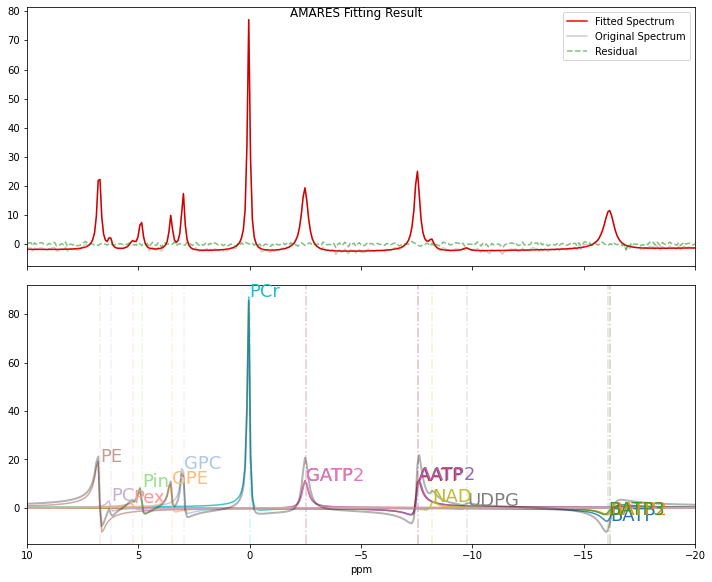

In [21]:
FIDresult3 = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                                fitting_parameters=initial_params_fixedphase, 
                       method='least_squares', ifplot=True,
                       inplace=False)

In [22]:
FIDresult3.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%)
name,,,,,,,,,,,,,,,
BATP,0.275,0.005,2.531,-16.196,0.009,0.040,61.729,1.624,3.565,12.698,0.273,2.946,0.000,0.000,nan
AATP,0.299,0.004,1.823,-7.540,0.003,0.030,31.970,0.606,2.500,12.698,0.273,2.946,0.000,0.000,nan
GATP,0.297,0.004,1.867,-2.511,0.005,0.127,40.898,0.774,2.567,12.698,0.273,2.946,0.000,0.000,nan
UDPG,0.012,0.004,43.224,-9.760,0.045,0.624,35.619,15.555,59.577,12.698,0.273,2.946,0.000,0.000,nan
NAD,0.036,0.004,15.803,-8.200,0.013,0.222,32.897,5.002,20.691,12.698,0.273,2.946,0.000,0.000,nan
PCr,0.422,0.002,0.758,0.000,0.000,1112.105,14.837,0.116,1.063,12.698,0.273,2.946,0.000,0.000,nan
GPC,0.132,0.003,2.847,2.940,0.002,0.075,19.098,0.552,3.945,12.698,0.273,2.946,0.000,0.000,nan
GPE,0.076,0.003,4.952,3.491,0.003,0.106,18.924,0.950,6.846,12.698,0.273,2.946,0.000,0.000,nan
Pin,0.078,0.004,7.129,4.830,0.004,0.102,22.514,1.409,8.535,12.698,0.273,2.946,0.000,0.000,nan


- **Convert lmfit Parameter to Pandas DataFrame**:
    - For comparison and easier editing, import functions that enable conversion between an lmfit Parameter object and a Python pandas DataFrame.

In [23]:
from pyAMARES import dataframe_to_parameters, parameters_to_dataframe

In [24]:
origin = parameters_to_dataframe(params) # Original parameters
result1 = parameters_to_dataframe(FIDresult1.fittedParams) # Fitting Result using HSVD initialized parameters
result2 = parameters_to_dataframe(FIDresult2.fittedParams) # Fitting Result using Levenberg-Marquardt initialized parameters
result3 = parameters_to_dataframe(FIDresult3.fittedParams) # Fitting Result using fixed phase of all peaks

In [25]:
# Generate index for peak amplitudes only.
amplitude_index = origin.name.str.startswith('ak')
amplitude_index

0      True
1     False
2     False
3     False
4     False
      ...  
75     True
76    False
77    False
78    False
79    False
Name: name, Length: 80, dtype: bool

In [26]:
# Define a function to do linear regression between two lists
import matplotlib.pyplot as plt
import scipy
def compare_plot(x, y, labellist, title='', 
                 xlabel='', 
                 ylabel=''):
    assert len(x) == len(y) == len(labellist)
    x = x / x[0]
    y = y / y[0]
    plt.scatter(x, y)
    for i, j, l in zip(x, y, labellist):
        plt.annotate(l, (i*1.02,j*1.02))

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = slope * x_fit + intercept
    plt.plot(x_fit, y_fit, 'r', label=f'{slope=:.3f}')  # Linear fit line

    combined_min = min(min(x), min(y)) * 0.95
    combined_max = max(max(x), max(y)) * 1.05
    plt.plot([combined_min, combined_max], [combined_min, combined_max], 'k--')  # Dashed diagonal line

    # Beautify the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.axis('equal')  # Use the same scale for both x and y axes

    # Print the results
    print(f"Slope: {slope:.3f}")
    print(f"Pearson's R: {r_value:.4f}")
    print(f"P-value: {p_value:.2e}")
    plt.title(f"{title} {r_value=:.2f} {p_value=:.2f}")
    plt.xlim(combined_min, combined_max)
    plt.ylim(combined_min, combined_max)
    plt.legend()
    # Display the plot
    plt.show()

    # Return the slope, Pearson's R, and p-value
    return slope, r_value, p_value


- Now we have three fitting results:
    - `result1`: Fitting result using HSVD-initialized parameters.
    - `result2`: Fitting result using Levenberg-Marquardt-initialized parameters.
    - `result3`: Fitting result with a fixed phase for all peaks.
- Compare them to the ground truth by linear regressions
    - Compare these fitting results to the ground truth using linear regression analyses.


Slope: 1.025
Pearson's R: 0.9997
P-value: 1.26e-23


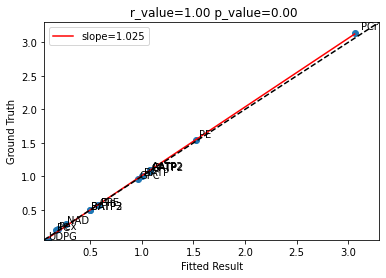

(1.0245483567674127, 0.9996654076364074, 1.2576738025789323e-23)

In [27]:
compare_plot(y=origin[amplitude_index]['value'], x=result1[amplitude_index]['value'], labellist=FIDresult1.peaklist, 
             xlabel='Fitted Result', ylabel='Ground Truth')

Slope: 1.025
Pearson's R: 0.9997
P-value: 1.27e-23


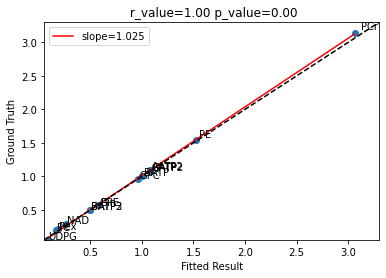

(1.0245371863890331, 0.9996649320454695, 1.2702393423481794e-23)

In [28]:
compare_plot(x=result2[amplitude_index]['value'], 
             y=origin[amplitude_index]['value'],
             labellist=FIDresult1.peaklist, 
             xlabel='Fitted Result', ylabel='Ground Truth')

Slope: 1.021
Pearson's R: 0.9998
P-value: 1.27e-24


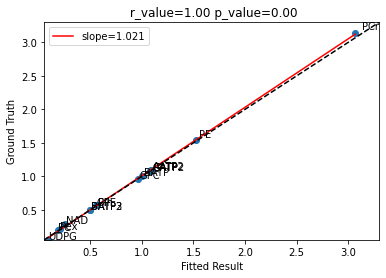

(1.0210353525698967, 0.9997588224987826, 1.2718031223056825e-24)

In [29]:
compare_plot(x=result3[amplitude_index]['value'], 
             y=origin[amplitude_index]['value'],
             labellist=FIDresult1.peaklist, 
             xlabel='Fitted Result', ylabel='Ground Truth')